In [142]:
import tensorflow as tf
import numpy as np
np.random.seed(1)
N=10000
def generate_experiment_data(size=N):
    d1 = np.random.normal(loc = 0.0, scale = 1.0, size = N)
    d2 = np.random.normal(loc = 2.0, scale = 1.0, size = N)
    return d1,d2
Wafer1, Wafer2 = generate_experiment_data(size=N)
print(np.shape(Wafer1))

(10000,)


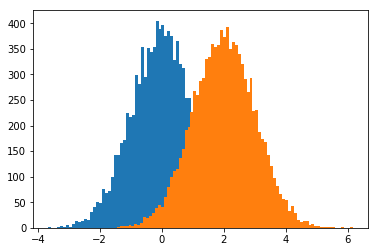

In [143]:
import matplotlib.pyplot as plt

plt.hist(Wafer1,bins=80)
plt.hist(Wafer2, bins=80)
plt.show()

In [144]:
def calc_parameters(Data1, Data2):
    N = len(Data1)
    u1 = np.sum(Data1) / N
    u2 = np.sum(Data2) / N

    var1 = np.sqrt(np.sum(np.power(Data1 - u1, 2))/ (N-1))
    var2 = np.sqrt(np.sum(np.power(Data2 - u2, 2))/ (N-1))
#     print(u1, u2)
#     print(var1, var2)

    a = var1/var2
    b = - var1 * u2 / var2 + u1
    return a,b
a,b = calc_parameters(Wafer1, Wafer2)
print(a, b)
wafer = a * Wafer2 + b
print(wafer)

0.9975994254533495 -1.994838957241338
[-0.12182001  0.22798197 -0.3510995  ...  2.40301207  0.88102625
 -0.09899733]


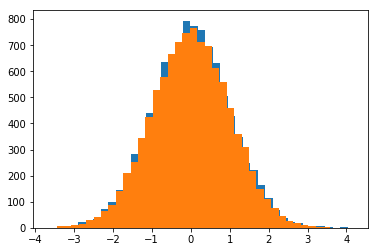

In [145]:
plt.hist(Wafer1,bins=40)
plt.hist(wafer, bins=40)
plt.show()

In [146]:
np.around([0.37, 1.64], decimals=1)

array([0.4, 1.6])

In [147]:
print(np.min(Wafer1))
print(np.around(-3.846185336600911, decimals=1))

-3.656440099254795
-3.8


In [148]:
def compare_equal(data1, data2, precision=0.01):
    delta = abs(data1)*precision
    if data2 > data1 - delta and data2 < data1 + delta:
        return True
    else:
        return False
    
def compute_accuracy(Data1, Data2, sort=True, precision=0.01):
    X1 = Data1
    X2 = Data2
    if sort:
        X1 = np.sort(Data1)
        X2 = np.sort(Data2)
    correct_prediction = 0
    TotalCount = len(X1)
    for i in range(0, TotalCount):
        if compare_equal(X1[i], X2[i], precision):
            correct_prediction +=1
    
    accuracy = correct_prediction/TotalCount
    return accuracy
        
accuracy = compute_accuracy(Wafer1, wafer, sort=True, precision=0.01)
print(accuracy)

0.337


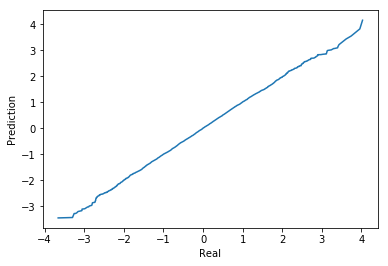

In [149]:
import matplotlib.pyplot as plt
plt.plot(X1, X2)
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.show()

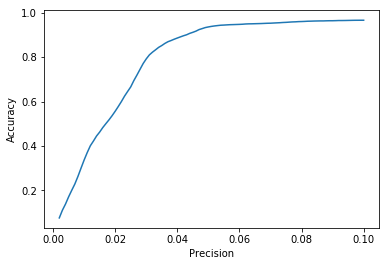

0.9655


In [150]:
precisions = np.arange(0.1, 0.001, -0.001)
# print(precisions)
accuracies = [compute_accuracy(Wafer1, wafer, sort=True, precision=i) for i in precisions]
import matplotlib.pyplot as plt
plt.plot(precisions, accuracies)
plt.xlabel('Precision')
plt.ylabel('Accuracy')
plt.show()
print(np.max(accuracies))

In [165]:
def compute_accuracy_with_size(size_list, precision=0.01):
    accuracies = []
    for i in size_list:
        Wafer1, Wafer2 = generate_experiment_data(i)
        a,b = calc_parameters(Wafer1, Wafer2)
        wafer = a * Wafer2 + b
#         print(np.shape(Wafer1), np.shape(wafer))
        accuracy = compute_accuracy(Wafer1, wafer, sort=True, precision=precision)
#         print("Hehe", accuracy)
        accuracies.append(accuracy)
        
    return accuracies
        
size_list = [i for i in range(100, 10000, 1000)]
# size_list = [100,10000]
accuracies = compute_accuracy_with_size(size_list, 0.1)

[100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100] 0.9786


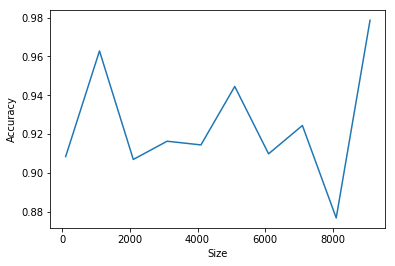

In [166]:
print(size_list, np.max(accuracies))
plt.plot(size_list, accuracies)
plt.xlabel('Size')
plt.ylabel('Accuracy')
plt.show()